# Iris Dataset
### Sepal Length (Comprimento da sépala)
### Sepal Width (Largura da sépala)
### Petal Length (Comprimento da pétala)
### Petal Width (Largura da pétala)
###
### 0 -> setosa
### 1 -> versicolor
### 2 -> virginica

## Importar Dataset

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Carregar o dataset
iris = load_iris()

# Criar um DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
#df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [30]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.784667,1.199333,1.000000
std,0.828066,0.435866,1.828475,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,10.000000,2.500000,2.000000


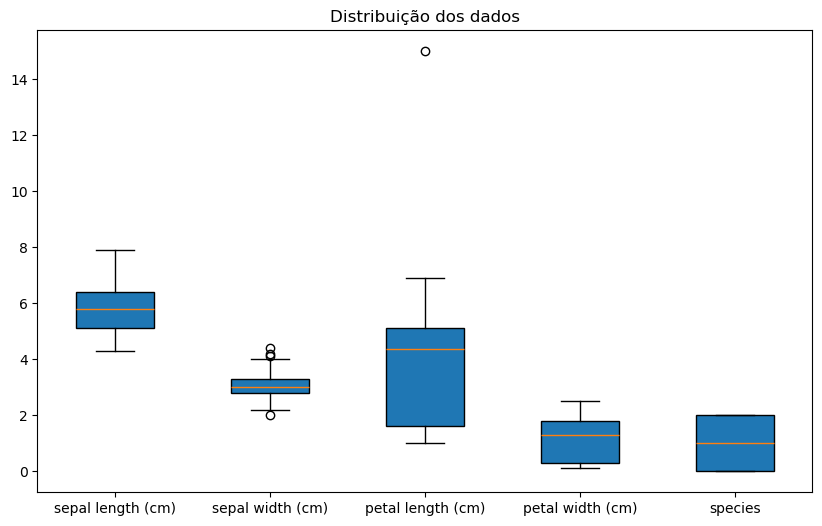

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.boxplot(df, labels = list(df.columns), patch_artist=True)
plt.title("Distribuição dos dados")
plt.show()

### Verificar se não existem valores nulos por coluna

In [2]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [19]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### Verificar quantos valores diferentes tem cada coluna

In [4]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

## Visulizar Correlações entre caractrísticas

In [7]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
species                    0.956547  1.000000  


In [6]:
import statsmodels.api as sm

X_test = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
X_test = sm.add_constant(X_test)
y_test = df['species']

model = sm.OLS(y_test, X_test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                species   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     494.6
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           3.00e-76
Time:                        12:59:32   Log-Likelihood:                -1.4817
No. Observations:                 150   AIC:                             10.96
Df Residuals:                     146   BIC:                             23.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0401      0.23

### Visulizar correlações num Mapa de Calor

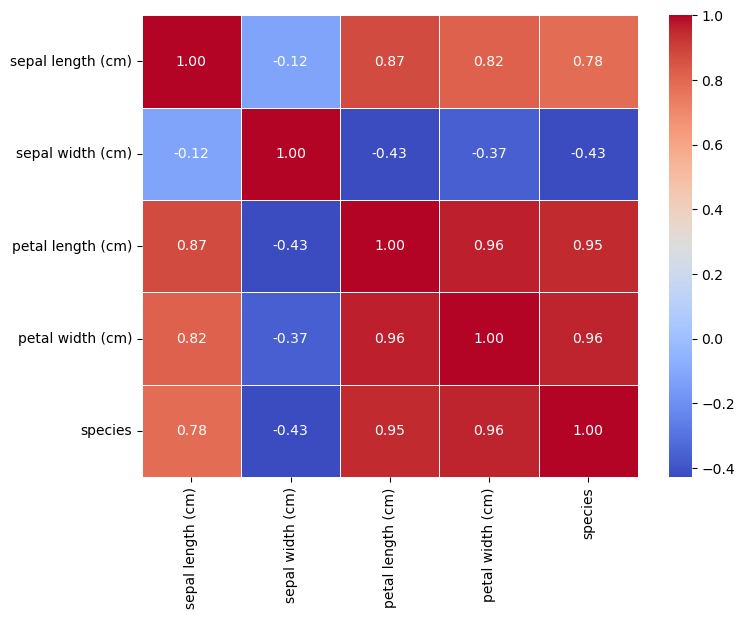

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Exibir o gráfico
plt.show()

### Visualizar a distribuição das espécies

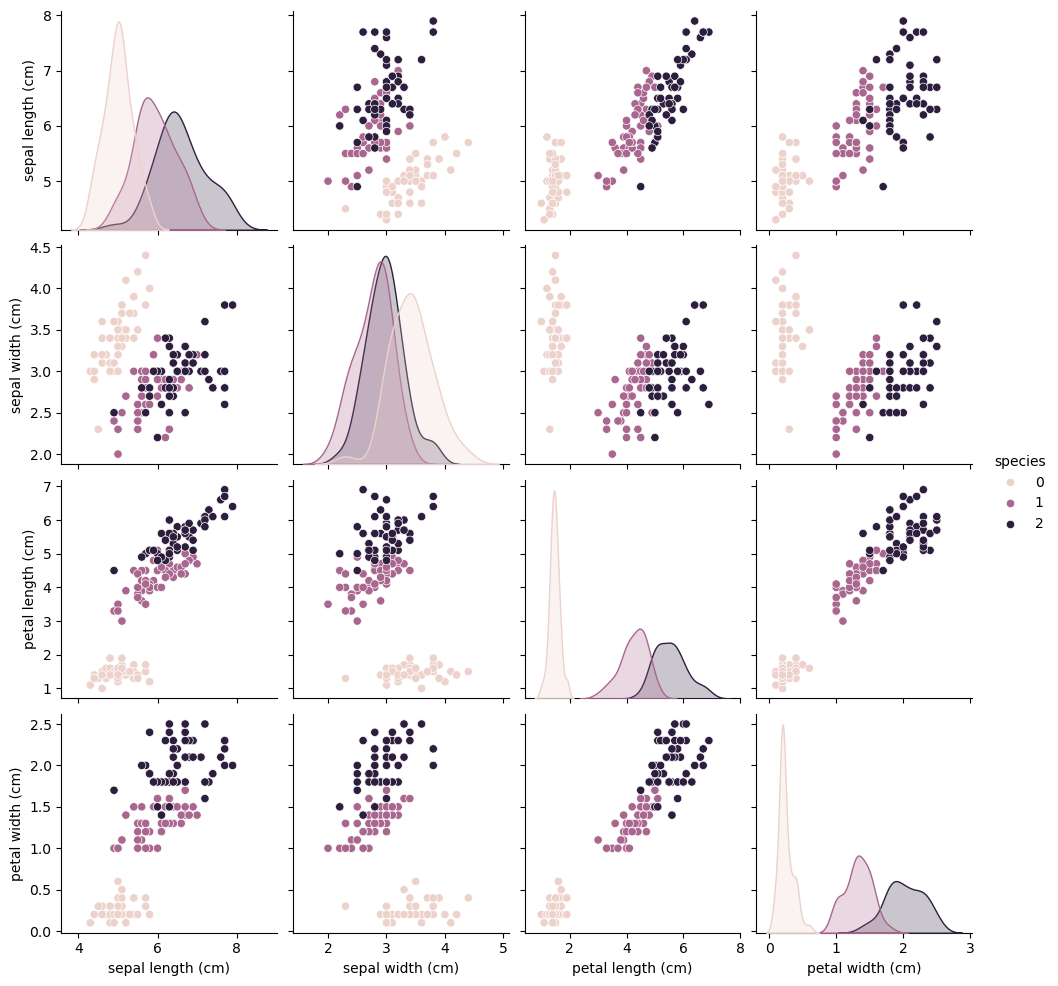

In [11]:
import matplotlib.pyplot as plt

sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

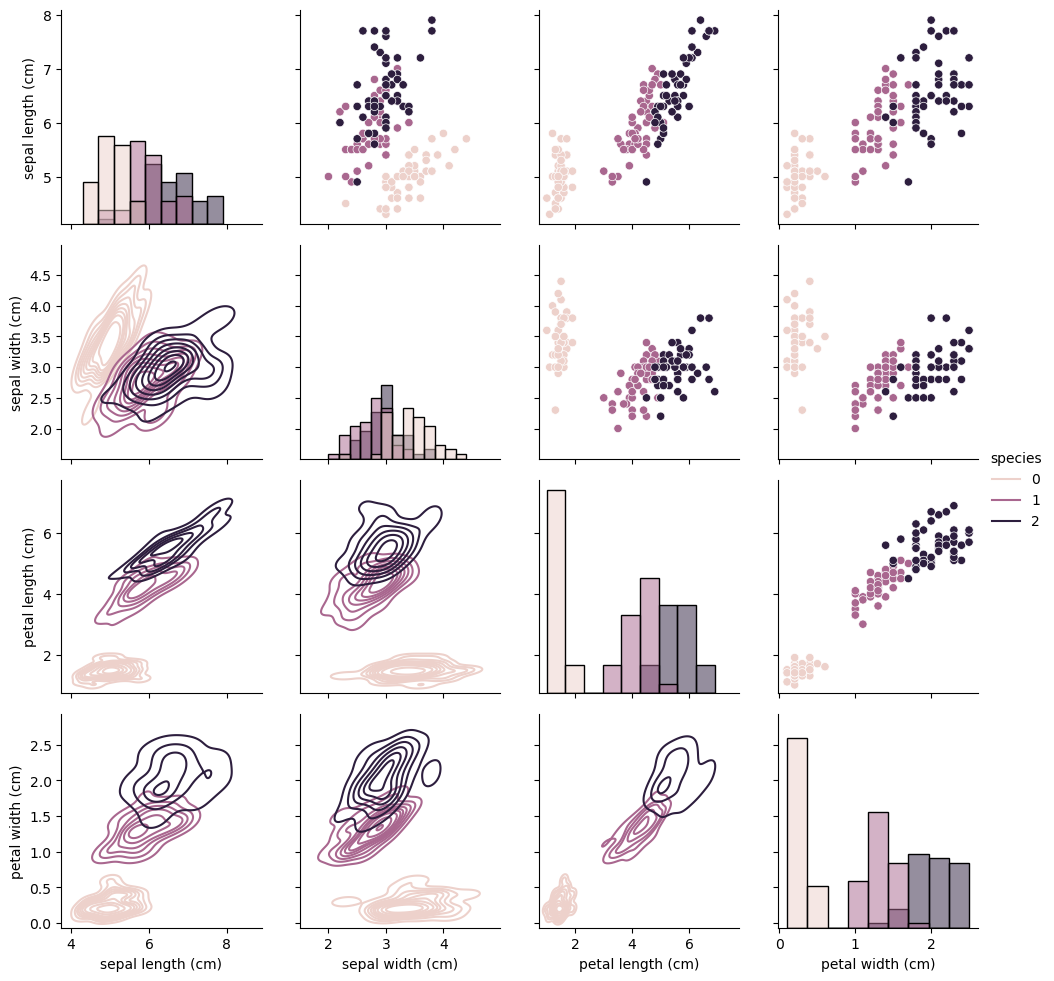

In [18]:
import seaborn as sns

#cores = {'setosa':'black', 'versicolor':'', '':''}
g = sns.PairGrid(df, hue="species")
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={"color", "k"})
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()

### Separar Dataset em X e Y

In [13]:
X = df.drop("species", axis=1)
y = df["species"]

### Dividir dados em Treino e Teste

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Treinar o modelo, fazer previsões e avaliar a exatidão

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 1.00


# Visualizar Árvore de Decisão

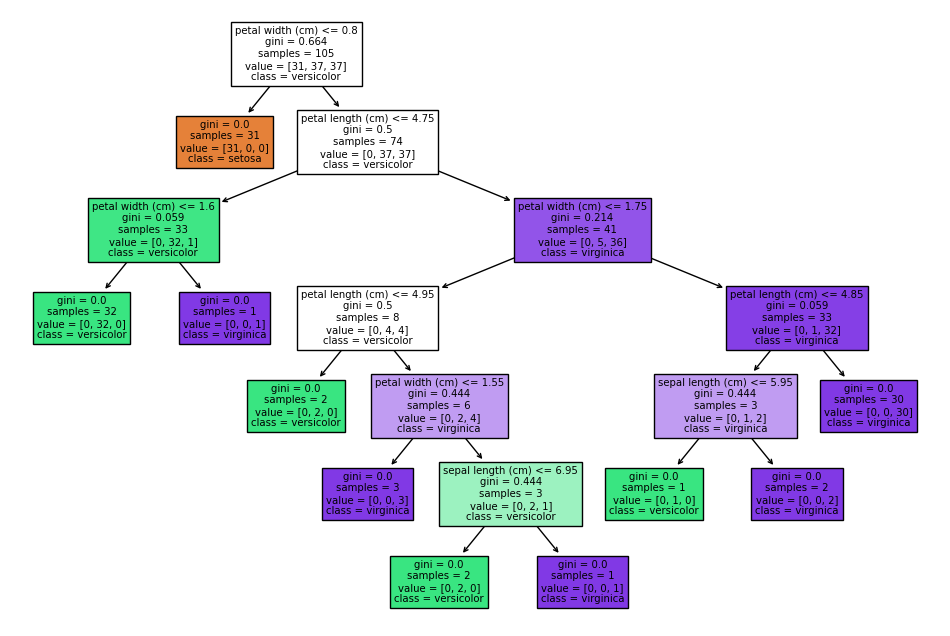

In [19]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=iris.target_names)
plt.show()

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[2., 2.]])
clf.predict_proba([[2., 2.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

### Forma alternativa de exportar arvores

In [25]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'''ou

dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph '''

CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'iris']' returned non-zero exit status 3221225477. [stderr: b'']

In [29]:
import graphviz

dot = graphviz.Digraph()
dot.node('A', 'Início')
dot.node('B', 'Processo')
dot.edge('A', 'B', 'Passo 1')

dot.render('output', format='png', view=True)

CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpng', '-O', 'output']' returned non-zero exit status 3221225477. [stderr: b'']

### Decision Tree Regressor

In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])